![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2F03+-+BigQuery+ML+%28BQML%29&file=BQML+Ensemble+Example.ipynb)
<!--- header table --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/03%20-%20BigQuery%20ML%20%28BQML%29/BQML%20Ensemble%20Example.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2F03%2520-%2520BigQuery%2520ML%2520%2528BQML%2529%2FBQML%2520Ensemble%2520Example.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/03%20-%20BigQuery%20ML%20%28BQML%29/BQML%20Ensemble%20Example.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/03%20-%20BigQuery%20ML%20%28BQML%29/BQML%20Ensemble%20Example.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</table>

# BQML Ensemble Examples

This notebook will examine using BQML to create an ensemble model. Specifially, a **stacked** ensemble model that combines the models created in notebooks `03a` through `03f`.

An ensemble is an approach to combining several machine learning models in order to make a better model.  Better how?  Low bias, and (or) variance.

**Bagging**

Baggins is taking multiple subsamples of the training data by randomly selecting rows, and maybe even columns.  Each subsample is missing some training rows and possible has duplicates of others (sampling with replacement).  One such method that is built around the concept of bagging is random forest.  Named this because it fits separate decision trees to each subsample and then combines, ensembles, to create a prediction.  Consider BigQuery ML with `model_type` = `'RANDOM_FOREST_CLASSIFIER'` or `'RANDOM_FOREST_REGRESSOR'`.  
- The number of subsamples (trees) is driven by the `NUM_PARALLEL_TREE` option which defaults to 50
- The number of rows in each subsample is driven by the `SUBSAMPLE` option which defaults to 0.8 (80%)
- The number of columns chosen for each subsample is driven by the parameter `COLSAMPLE_BYTREE` option which defaults to 1 (all columns)

The averaging of models from subsamples is effective at reducing the model variance.

**Boosting**

Boosting is iteratively building a model by fitting a new model for the residuals of a prior iteration and then adding its prediction to the overall ensemble model. Each iteration attempts to fix the mistakes left behind by the prior iterations.  One such method that is built around the concept of boosting is boosted trees.  Called this because it fits short trees iteratively.  Consider BigQuery ML with `model_type` = `'BOOSTED_TREE_CLASSIFIER'` or `'BOOSTED_TREE_REGRESSOR'`.
- The number of iterations for boosting is set by the `MAX_ITERATIONS` option which defaults to 20
- If the progress of each iteration slows down then it can be stopped if the `EARLY_STOP` option is set to `TRUE` (the default)
    - The progress of training continues until the loss improvement falls below the `MIN_REL_PROGRESS` option which defaults to 0.01

The iterations of boosting are effective at reducing the model bias.

**Stacking**

Combine the predictions from multiple models to make an overall prediction.  This is a meta-model, or model of models.  It can be comprised of different types of models.  The meta-model is trained using the individual models predictions as features.  This notebook will show how to create a stacked model in BigQuery ML.

This can be very effective at controlling bias from individual models while reducing the overall variance.

---

**Prerequisites:**
- [01 - BigQuery - Table Data Source](../01%20-%20Data%20Sources/01%20-%20BigQuery%20-%20Table%20Data%20Source.ipynb)
- Multiple Notebooks From: `03a`, `03b`, `03c`, `03d`, `03e`, `03f`

**Resources:**
- [BigQuery ML (BQML) Overview](https://cloud.google.com/bigquery-ml/docs/introduction)
- [Overview of BQML methods and workflows](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-e2e-journey)
- [BigQuery](https://cloud.google.com/bigquery)
    - [Documentation:](https://cloud.google.com/bigquery/docs/query-overview)
    - [API:](https://cloud.google.com/bigquery/docs/reference/libraries-overview)
        - [Clients](https://cloud.google.com/bigquery/docs/reference/libraries)
            - [Python SDK:](https://github.com/googleapis/python-bigquery)
            - [Python Library Reference:](https://cloud.google.com/python/docs/reference/bigquery/latest)
- [Vertex AI](https://cloud.google.com/vertex-ai)
    - [Documentation:](https://cloud.google.com/vertex-ai/docs/start/introduction-unified-platform)
    - [API:](https://cloud.google.com/vertex-ai/docs/reference)
        - [Clients:](https://cloud.google.com/vertex-ai/docs/start/client-libraries)
            - [Python SDK:](https://github.com/googleapis/python-aiplatform)
            - [Python Library Reference:](https://cloud.google.com/python/docs/reference/aiplatform/latest)

---
## Colab Setup

To run this notebook in Colab click [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/03%20-%20BigQuery%20ML%20(BQML)/BQML%20Ensemble%20Example.ipynb) and run the cells in this section.  Otherwise, skip this section.

This cell will authenticate to GCP (follow prompts in the popup). 

In [475]:
PROJECT_ID = 'statmike-mlops-349915' # replace with project ID

Updated property [core/project].


In [473]:
try:
    import google.colab
    from google.colab import auth
    auth.authenticate_user()
    !gcloud config set project {PROJECT_ID}
except Exception:
    pass

---
## Setup

inputs:

In [2]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [3]:
REGION = 'us-central1'
EXPERIMENT = 'ensemble'
SERIES = '03'

# source data
BQ_PROJECT = PROJECT_ID
BQ_DATASET = 'fraud'
BQ_TABLE = 'fraud_prepped'

# Model Training
VAR_TARGET = 'Class'
VAR_OMIT = 'transaction_id' # add more variables to the string with space delimiters

packages:

In [4]:
from google.cloud import bigquery
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import metrics

clients:

In [5]:
bq = bigquery.Client(project = PROJECT_ID)

parameters:

In [6]:
TIMESTAMP = datetime.now().strftime("%Y%m%d%H%M%S")
RUN_NAME = f'run-{TIMESTAMP}'

BQ_MODEL = f'{SERIES}_{EXPERIMENT}_{TIMESTAMP}'

---
## Review Data

The data source here was prepared in [01 - BigQuery - Table Data Source](../01%20-%20Data%20Sources/01%20-%20BigQuery%20-%20Table%20Data%20Source.ipynb).  In this notebook we will use prepared BigQuery table to build a model with BigQuery ML (BQML).

This is a table of 284,807 credit card transactions classified as fradulant or normal in the column `Class`.  In order protect confidentiality, the original features have been transformed using [principle component analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) into 28 features named `V1, V2, ... V28` (float).  Two descriptive features are provided without transformation by PCA:
- `Time` (integer) is the seconds elapsed between the transaction and the earliest transaction in the table
- `Amount` (float) is the value of the transaction

The data preparation included added splits for machine learning with a column named `splits` with 80% for training (`TRAIN`), 10% for validation (`VALIDATE`) and 10% for testing (`TEST`).  Additionally, a unique identifier was added to each transaction, `transaction_id`.  

Review the number of records for each level of Class (VAR_TARGET) for each of the data splits:

In [7]:
query = f"""
SELECT splits, {VAR_TARGET}, count(*) as n
FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
GROUP BY splits, {VAR_TARGET}
"""
bq.query(query = query).to_dataframe()

,splits,Class,n
0,TEST,0,28455
1,TEST,1,47
2,TRAIN,0,227664
3,TRAIN,1,397
4,VALIDATE,0,28196
5,VALIDATE,1,48


Further review the balance of the target variable (VAR_TARGET) for each split as a percentage of the split:

In [8]:
query = f"""
WITH
    COUNTS as (SELECT splits, {VAR_TARGET}, count(*) as n FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}` GROUP BY splits, {VAR_TARGET})
    
SELECT *,
    SUM(n) OVER() as total,
    SAFE_DIVIDE(n, SUM(n) OVER(PARTITION BY {VAR_TARGET})) as n_pct_class,
    SAFE_DIVIDE(n, SUM(n) OVER(PARTITION BY splits)) as n_pct_split,
    SAFE_DIVIDE(SUM(n) OVER(PARTITION BY {VAR_TARGET}), SUM(n) OVER()) as class_pct_total
FROM COUNTS
"""
review = bq.query(query = query).to_dataframe()
review

,splits,Class,n,total,n_pct_class,n_pct_split,class_pct_total
0,TRAIN,1,397,284807,0.806911,0.001741,0.001727
1,TRAIN,0,227664,284807,0.800746,0.998259,0.998273
2,TEST,1,47,284807,0.095528,0.001649,0.001727
3,TEST,0,28455,284807,0.100083,0.998351,0.998273
4,VALIDATE,1,48,284807,0.097561,0.001699,0.001727
5,VALIDATE,0,28196,284807,0.099172,0.998301,0.998273


---
## List Individual Models

Get a list of models for this series of notebooks.  Filter to models that are part of the experiments `03a` through `03f` and if there is more than one model for an experiment take the most recent model.

In [41]:
models = []
for m in bq.list_models(f'{BQ_PROJECT}.{BQ_DATASET}'):
    if m.labels.get('series'):
        if m.labels['series'] == SERIES and m.labels['experiment'].startswith(SERIES):
            # store the first match
            if len(models) == 0:
                #print(m.model_id)
                models += [m]
            # if not the first match, check experiment and if duplicate replace the saved model in models
            elif m.labels['experiment'] == models[-1].labels['experiment']:
                #print(m.model_id)
                models[-1] = m
            # if not the first and not a duplicate then add to models
            else:
                #print(m.model_id)
                models += [m]
                
for m in models: print(m.labels, m.project, m.dataset_id, m.model_id)

{'experiment': '03a', 'series': '03'} statmike-mlops-349915 fraud 03_03a_20221110162611
{'experiment': '03b', 'series': '03'} statmike-mlops-349915 fraud 03_03b_20221003123639
{'experiment': '03c', 'series': '03'} statmike-mlops-349915 fraud 03_03c_20221003125950
{'experiment': '03d', 'series': '03'} statmike-mlops-349915 fraud 03_03d_20221003125956
{'experiment': '03e', 'series': '03'} statmike-mlops-349915 fraud 03_03e_20221003130007
{'experiment': '03f', 'series': '03'} statmike-mlops-349915 fraud 03_03f_20221003130014


## Retrieve Predictions From A Model

In [65]:
m = models[0]

pred_query = f"""
    SELECT {VAR_TARGET}, predicted_{VAR_TARGET} AS pred_{m.model_id}, splits
    FROM ML.PREDICT(
        MODEL `{m.project}.{m.dataset_id}.{m.model_id}`,
        (SELECT * FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`)
    )
"""

print(pred_query)

bq.query(query = pred_query + 'LIMIT 5').to_dataframe()


    SELECT Class, predicted_Class AS pred_03_03a_20221110162611, splits
    FROM ML.PREDICT(
        MODEL `statmike-mlops-349915.fraud.03_03a_20221110162611`,
        (SELECT * FROM `statmike-mlops-349915.fraud.fraud_prepped`)
    )



,Class,pred_03_03a_20221110162611,splits
0,0,0,TEST
1,0,0,TEST
2,0,0,TEST
3,0,0,TEST
4,0,0,TEST


## Retrieve Predictions From All Models

Construct a query that joins predictions from all of the models:

In [66]:
# build the query that joins predictions from each model:
for i, m in enumerate(models):
    if i == 0:
        pred_query = f"""
            SELECT *
            FROM (
                SELECT {VAR_TARGET}, predicted_{VAR_TARGET} AS pred_{m.model_id}, transaction_id, splits
                FROM ML.PREDICT(
                    MODEL `{m.project}.{m.dataset_id}.{m.model_id}`,
                    (SELECT * FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`)
                )
            )
        """
    else:
        pred_query += f"""
            JOIN (
                SELECT predicted_{VAR_TARGET} AS pred_{m.model_id}, transaction_id, splits
                FROM ML.PREDICT(
                    MODEL `{m.project}.{m.dataset_id}.{m.model_id}`,
                    (SELECT * FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`)
                )            
            ) USING(transaction_id, splits)
        """

print(pred_query)


            SELECT *
            FROM (
                SELECT Class, predicted_Class AS pred_03_03a_20221110162611, transaction_id, splits
                FROM ML.PREDICT(
                    MODEL `statmike-mlops-349915.fraud.03_03a_20221110162611`,
                    (SELECT * FROM `statmike-mlops-349915.fraud.fraud_prepped`)
                )
            )
        
            JOIN (
                SELECT predicted_Class AS pred_03_03b_20221003123639, transaction_id, splits
                FROM ML.PREDICT(
                    MODEL `statmike-mlops-349915.fraud.03_03b_20221003123639`,
                    (SELECT * FROM `statmike-mlops-349915.fraud.fraud_prepped`)
                )            
            ) USING(transaction_id, splits)
        
            JOIN (
                SELECT predicted_Class AS pred_03_03c_20221003125950, transaction_id, splits
                FROM ML.PREDICT(
                    MODEL `statmike-mlops-349915.fraud.03_03c_20221003125950`,
               

In [67]:
bq.query(query = pred_query + 'LIMIT 5').to_dataframe()

,transaction_id,splits,Class,pred_03_03a_20221110162611,pred_03_03b_20221003123639,pred_03_03c_20221003125950,pred_03_03d_20221003125956,pred_03_03e_20221003130007,pred_03_03f_20221003130014
0,a1b10547-d270-48c0-b902-7a0f735dadc7,TEST,0,0,0,0,0,0,0
1,814c62c8-ade4-47d5-bf83-313b0aafdee5,TEST,0,0,0,0,0,0,0
2,d08a1bfa-85c5-4f1b-9537-1c5a93e6afd0,TEST,0,0,0,0,0,0,0
3,802f3307-8e5a-4475-b795-5d5d8d7d0120,TEST,0,0,0,0,0,0,0
4,c8a5b93a-1598-4689-80be-4f9f5df0b8ce,TEST,0,0,0,0,0,0,0


---
## Train Ensemble Model (Meta-Model)

Create a stacked ensemble model can be done with any supervised approach.  In this example, logistic regression is used.

Use BigQuery ML to train the stack ensemble model using multiclass logistic regression model:
- [Logistic Regression](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-create-glm) with BigQuery ML (BQML)
- This uses the `splits` column that notebook `01` created
- `data_split_method = CUSTOM` uses the column in `data_split_col` to assign training data for `FALSE` values and evaluation data for `TRUE` values.
    - in this example the `WHERE splits != 'TEST'` statement filters out the test data and
    - the `CASE` statement maps training data to FALSE and validation data to TRUE

In [68]:
model_query = f"""
CREATE MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}`
OPTIONS (
        model_type = 'LOGISTIC_REG',
        auto_class_weights = TRUE,
        input_label_cols = ['{VAR_TARGET}'],
        enable_global_explain = TRUE,
        data_split_col = 'custom_splits',
        data_split_method = 'CUSTOM'
    ) AS
SELECT * EXCEPT(transaction_id, splits),
    CASE
        WHEN splits = 'TRAIN' THEN FALSE
        ELSE TRUE
    END AS custom_splits
FROM (
{pred_query}
)
WHERE splits != 'TEST'
"""
print(model_query)


CREATE MODEL `statmike-mlops-349915.fraud.03_ensemble_20230215125354`
OPTIONS (
        model_type = 'LOGISTIC_REG',
        auto_class_weights = TRUE,
        input_label_cols = ['Class'],
        enable_global_explain = TRUE,
        data_split_col = 'custom_splits',
        data_split_method = 'CUSTOM'
    ) AS
SELECT * EXCEPT(transaction_id, splits),
    CASE
        WHEN splits = 'TRAIN' THEN FALSE
        ELSE TRUE
    END AS custom_splits
FROM (

            SELECT *
            FROM (
                SELECT Class, predicted_Class AS pred_03_03a_20221110162611, transaction_id, splits
                FROM ML.PREDICT(
                    MODEL `statmike-mlops-349915.fraud.03_03a_20221110162611`,
                    (SELECT * FROM `statmike-mlops-349915.fraud.fraud_prepped`)
                )
            )
        
            JOIN (
                SELECT predicted_Class AS pred_03_03b_20221003123639, transaction_id, splits
                FROM ML.PREDICT(
                    MOD

In [69]:
job = bq.query(query = model_query)
job.result()

In [70]:
(job.ended-job.started).total_seconds()

238.873

Add labels to the model in BigQuery:

In [71]:
model = bq.get_model(f'{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}')
model.labels = {'series' : f'{SERIES}', 'experiment' : f'{EXPERIMENT}'}
model = bq.update_model(model, ['labels'])

Review the Model Inputs, the feature information, with [ML.FEATURE_INFO](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-feature):

In [72]:
feature_info = bq.query(
    query = f"""
        SELECT *
        FROM ML.FEATURE_INFO(MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}`)
        """
).to_dataframe()
feature_info

,input,min,max,mean,median,stddev,category_count,null_count,dimension
0,pred_03_03a_20221110162611,0.0,1.0,0.019236,0.0,0.137354,NaN,0,NaN
1,pred_03_03b_20221003123639,0.0,1.0,0.004262,0.0,0.065145,NaN,0,NaN
2,pred_03_03c_20221003125950,0.0,1.0,0.002192,0.0,0.046772,NaN,0,NaN
3,pred_03_03d_20221003125956,0.0,1.0,0.001359,0.0,0.036844,NaN,0,NaN
4,pred_03_03e_20221003130007,0.0,1.0,0.001535,0.0,0.039145,NaN,0,NaN
5,pred_03_03f_20221003130014,0.0,1.0,0.019311,0.0,0.137615,NaN,0,NaN


Review the iterations from training with [ML.TRAINING_INFO](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-train):

In [73]:
history = bq.query(
    query = f"""
        SELECT *
        FROM ML.TRAINING_INFO(MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}`)
        ORDER BY iteration"""
).to_dataframe()
history

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,0,0.681734,0.685453,0.1,7947
1,0,1,0.658896,0.662533,0.2,9849
2,0,2,0.615863,0.619338,0.4,10862
3,0,3,0.539543,0.542714,0.8,9736
4,0,4,0.419847,0.422520,1.6,10916
5,0,5,0.272321,0.274472,3.2,8976
6,0,6,0.146589,0.148507,6.4,11388
7,0,7,0.071642,0.073431,12.8,11920
8,0,8,0.036499,0.038194,25.6,8415
9,0,9,0.023028,0.025236,51.2,10193


Plot the loss history:

<AxesSubplot:xlabel='iteration'>

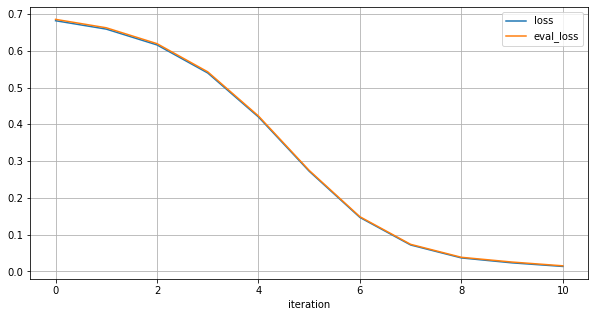

In [74]:
history.plot(x = 'iteration', y = ['loss','eval_loss'], figsize = (10, 5), grid = True)

### Check out this model in BigQuery Console:
- Make sure project selected is the one from this notebook
- Under Explore, expand this project and dataset
- Expand Models and select the model create here

In [75]:
print(f'BigQuery Console for Project:\nhttps://console.cloud.google.com/bigquery?project={PROJECT_ID}')

BigQuery Console for Project:
https://console.cloud.google.com/bigquery?project=statmike-mlops-349915


In [76]:
print(f'Direct link to the model in BigQuery:\nhttps://console.cloud.google.com/bigquery?project={PROJECT_ID}&ws=!1m5!1m4!5m3!1s{PROJECT_ID}!2s{BQ_DATASET}!3s{BQ_MODEL}')

Direct link to the model in BigQuery:
https://console.cloud.google.com/bigquery?project=statmike-mlops-349915&ws=!1m5!1m4!5m3!1sstatmike-mlops-349915!2sfraud!3s03_ensemble_20230215125354


---
## Evaluate Ensemble Model

### Metrics

Review the model evaluation statistics on the splits with [ML.EVALUATE](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-evaluate):

In [77]:
query = f"""
SELECT 'TEST' as SPLIT, * FROM ML.EVALUATE (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}`,
    (SELECT * FROM ({pred_query}) WHERE SPLITS='TEST'))
UNION ALL
SELECT 'VALIDATE' as SPLIT, * FROM ML.EVALUATE (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}`,
    (SELECT * FROM ({pred_query}) WHERE SPLITS='VALIDATE'))
UNION ALL
SELECT 'TRAIN' as SPLIT, * FROM ML.EVALUATE (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}`,
    (SELECT * FROM ({pred_query}) WHERE SPLITS='TRAIN'))
"""
bq.query(query = query).to_dataframe()

,SPLIT,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,VALIDATE,0.727273,0.833333,0.999186,0.776699,0.015009,0.835745
1,TEST,0.780000,0.829787,0.999333,0.804124,0.014694,0.853373
2,TRAIN,0.789264,1.000000,0.999535,0.882222,0.013296,1.000000


### Compare Metrics From Individual Models to Ensemble Model

In [109]:
metric_query = f"""
WITH
    PREDS AS (
{pred_query}
    )
SELECT '{BQ_MODEL}' as MODEL, * FROM ML.EVALUATE (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}`,
    (SELECT * FROM PREDS WHERE SPLITS='TEST'))
"""

for m in models:
    metric_query += f"""
UNION ALL
SELECT '{m.model_id}' as MODEL, precision, recall, accuracy, f1_score, log_loss, roc_auc FROM ML.EVALUATE (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{m.model_id}`,
    (SELECT * FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}` WHERE SPLITS='TEST'))    
"""
#print(metric_query)

In [108]:
bq.query(query = metric_query).to_dataframe()

,MODEL,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,03_03a_20221110162611,0.079545,0.893617,0.982773,0.146087,0.115187,0.982009
1,03_03e_20221003130007,0.860465,0.787234,0.999439,0.822222,0.003116,0.964461
2,03_03b_20221003123639,0.352941,0.893617,0.997123,0.506024,0.059136,0.965114
3,03_03f_20221003130014,0.079545,0.893617,0.982773,0.146087,0.118337,0.979953
4,03_03d_20221003125956,0.861111,0.659574,0.999263,0.746988,0.003343,0.966299
5,03_03c_20221003125950,0.780000,0.829787,0.999333,0.804124,0.129526,0.973328
6,03_ensemble_20230215125354,0.780000,0.829787,0.999333,0.804124,0.014694,0.853373


### Confusion Matrix

Review the confusion matrix for each split with [ML.CONFUSION_MATRIX](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-confusion):

In [78]:
query = f"""
SELECT *
FROM ML.CONFUSION_MATRIX (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}`,(
    SELECT *
    FROM ({pred_query})
    WHERE splits = 'TRAIN')
  )
"""
bq.query(query = query).to_dataframe()

,expected_label,_0,_1
0,0,227558,106
1,1,0,397


In [79]:
query = f"""
SELECT *
FROM ML.CONFUSION_MATRIX (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}`,(
    SELECT *
    FROM ({pred_query})
    WHERE splits = 'VALIDATE')
  )
"""
bq.query(query = query).to_dataframe()

,expected_label,_0,_1
0,0,28181,15
1,1,8,40


In [80]:
query = f"""
SELECT *
FROM ML.CONFUSION_MATRIX (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}`,(
    SELECT *
    FROM ({pred_query})
    WHERE splits = 'TEST')
  )
"""
bq.query(query = query).to_dataframe()

,expected_label,_0,_1
0,0,28444,11
1,1,8,39


### ROC Curve

Retrieve the ROC Curve for each split using [ML.ROC_CURVE](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-roc):

In [81]:
query = f"""
SELECT *
FROM ML.ROC_CURVE (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}`,(
    SELECT *
    FROM ({pred_query})
    WHERE splits = 'TRAIN')
  )
ORDER BY false_positive_rate
"""
train_roc = bq.query(query = query).to_dataframe()
train_roc.head()

,threshold,recall,false_positive_rate,true_positives,false_positives,true_negatives,false_negatives
0,1.000000,0.654912,0.000163,260,37,227627,137
1,0.010195,1.000000,0.979430,397,222981,4683,0
2,0.005762,1.000000,0.981855,397,223533,4131,0
3,0.003205,1.000000,0.997931,397,227193,471,0
4,0.000539,1.000000,1.000000,397,227664,0,0


In [82]:
query = f"""
SELECT *
FROM ML.ROC_CURVE (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}`,(
    SELECT *
    FROM ({pred_query})
    WHERE splits = 'VALIDATE')
  )
ORDER BY false_positive_rate
"""
val_roc = bq.query(query = query).to_dataframe()
val_roc.head()

,threshold,recall,false_positive_rate,true_positives,false_positives,true_negatives,false_negatives
0,1.000000,0.5625,0.000177,27,5,28191,21
1,0.010195,0.9375,0.977905,45,27573,623,3
2,0.005762,0.9375,0.981274,45,27668,528,3
3,0.003205,1.0000,0.997872,48,28136,60,0
4,0.000539,1.0000,1.000000,48,28196,0,0


In [83]:
query = f"""
SELECT *
FROM ML.ROC_CURVE (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}`,(
    SELECT *
    FROM ({pred_query})
    WHERE splits = 'TEST')
  )
ORDER BY false_positive_rate
"""
test_roc = bq.query(query = query).to_dataframe()
test_roc.head()

,threshold,recall,false_positive_rate,true_positives,false_positives,true_negatives,false_negatives
0,1.000000,0.659574,0.000176,31,5,28450,16
1,0.010195,0.957447,0.979722,45,27878,577,2
2,0.005762,0.957447,0.982147,45,27947,508,2
3,0.003205,0.957447,0.997681,45,28389,66,2
4,0.000539,1.000000,1.000000,47,28455,0,0


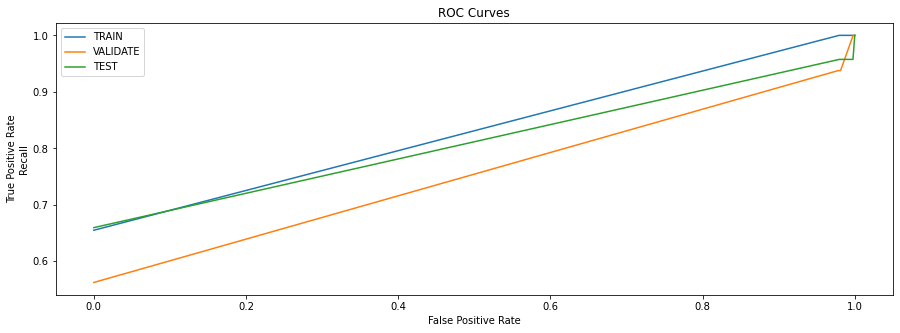

In [84]:
plt.figure(figsize=(15,5))
plt.plot(train_roc['false_positive_rate'], train_roc['recall'], label='TRAIN')
plt.plot(val_roc['false_positive_rate'], val_roc['recall'], label='VALIDATE')
plt.plot(test_roc['false_positive_rate'], test_roc['recall'], label='TEST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate\nRecall')
plt.title('ROC Curves')
plt.legend()
plt.show()

---
## Predictions With BigQuery ML (BQML)

Create a pandas dataframe with retrieved predictions for the test data in the table using [ML.PREDICT](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-predict):

In [110]:
query = f"""
SELECT *
FROM ML.PREDICT (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}`,(
    SELECT *
    FROM ({pred_query})
    WHERE splits = 'TEST')
  )
"""
pred = bq.query(query = query).to_dataframe()

Review columns from the predictions - note that the query added columns with prefix `predicted_`

In [111]:
pred.columns

Index(['predicted_Class', 'predicted_Class_probs', 'transaction_id', 'splits',
       'Class', 'pred_03_03a_20221110162611', 'pred_03_03b_20221003123639',
       'pred_03_03c_20221003125950', 'pred_03_03d_20221003125956',
       'pred_03_03e_20221003130007', 'pred_03_03f_20221003130014'],
      dtype='object')

Print the first few rows for the columns related to the actual and predicted values:

In [112]:
pred[[VAR_TARGET, f'predicted_{VAR_TARGET}', f'predicted_{VAR_TARGET}_probs', 'splits']].head()

,Class,predicted_Class,predicted_Class_probs,splits
0,0,0,"[{'label': 1, 'prob': 0.010195430896355544}, {...",TEST
1,0,0,"[{'label': 1, 'prob': 0.010195430896355544}, {...",TEST
2,0,0,"[{'label': 1, 'prob': 0.010195430896355544}, {...",TEST
3,0,0,"[{'label': 1, 'prob': 0.010195430896355544}, {...",TEST
4,0,0,"[{'label': 1, 'prob': 0.010195430896355544}, {...",TEST


Notice the nested dictionary for predicted probabilities.  In BigQuery this is a Record type structure with nested fields for `label` and `prop`.  This is returned to the pandas dataframe as a nested dictionary.

The following code sorts the dictionary for the first record by `prob`:

In [113]:
exec('temp = pred.predicted_'+VAR_TARGET+'_probs[0]')
[sorted(x, key = lambda x: x['label']) for x in [temp]]

[[{'label': 0, 'prob': 0.9898045691036444},
  {'label': 1, 'prob': 0.010195430896355544}]]

---
## Custom Eval Metrics
Retrieve the predictions to a local dataframe and use [scikit-learn](https://scikit-learn.org/stable/index.html) metrics [fuctions](https://scikit-learn.org/stable/modules/model_evaluation.html) to do model evaluation.

In [114]:
metrics.confusion_matrix(list(pred[f'{VAR_TARGET}']), list(pred[f'predicted_{VAR_TARGET}']))

array([[28444,    11],
       [    8,    39]])

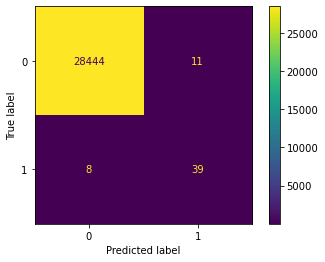

In [115]:
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix = metrics.confusion_matrix(list(pred[f'{VAR_TARGET}']), list(pred[f'predicted_{VAR_TARGET}']))
)
disp.plot()

In [116]:
metrics.accuracy_score(list(pred[f'{VAR_TARGET}']), list(pred[f'predicted_{VAR_TARGET}']))

0.9993333801136762

In [117]:
print(metrics.classification_report(list(pred[f'{VAR_TARGET}']), list(pred[f'predicted_{VAR_TARGET}'])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28455
           1       0.78      0.83      0.80        47

    accuracy                           1.00     28502
   macro avg       0.89      0.91      0.90     28502
weighted avg       1.00      1.00      1.00     28502



---
## Explanations
[Built-in](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-xai-overview) capabilities to understand how features contributed to predictions both individually (local) and overall (global).

### Local Explainability
Retrieve feature attribution values to interpret each features contribution to a prediction relative to the baseline prediction using [ML.EXPLAIN_PREDICT](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-explain-predict).

In [118]:
query = f"""
SELECT *
FROM ML.EXPLAIN_PREDICT (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}`,(
    SELECT *
    FROM ({pred_query})
    WHERE splits = 'TEST'), STRUCT(10 as top_k_features)
  )
"""
explain = bq.query(query = query).to_dataframe()

In [119]:
explain.head()

,predicted_Class,probability,top_feature_attributions,baseline_prediction_value,prediction_value,approximation_error,transaction_id,splits,Class,pred_03_03a_20221110162611,pred_03_03b_20221003123639,pred_03_03c_20221003125950,pred_03_03d_20221003125956,pred_03_03e_20221003130007,pred_03_03f_20221003130014
0,0,0.989805,"[{'feature': 'pred_03_03c_20221003125950', 'at...",-4.566967,-4.575568,0.0,a1b10547-d270-48c0-b902-7a0f735dadc7,TEST,0,0,0,0,0,0,0
1,0,0.989805,"[{'feature': 'pred_03_03c_20221003125950', 'at...",-4.566967,-4.575568,0.0,814c62c8-ade4-47d5-bf83-313b0aafdee5,TEST,0,0,0,0,0,0,0
2,0,0.989805,"[{'feature': 'pred_03_03c_20221003125950', 'at...",-4.566967,-4.575568,0.0,d08a1bfa-85c5-4f1b-9537-1c5a93e6afd0,TEST,0,0,0,0,0,0,0
3,0,0.989805,"[{'feature': 'pred_03_03c_20221003125950', 'at...",-4.566967,-4.575568,0.0,802f3307-8e5a-4475-b795-5d5d8d7d0120,TEST,0,0,0,0,0,0,0
4,0,0.989805,"[{'feature': 'pred_03_03c_20221003125950', 'at...",-4.566967,-4.575568,0.0,c8a5b93a-1598-4689-80be-4f9f5df0b8ce,TEST,0,0,0,0,0,0,0


Create a plot of feature attributions for a single prediction:

In [120]:
explanation = explain.iloc[0]['top_feature_attributions']

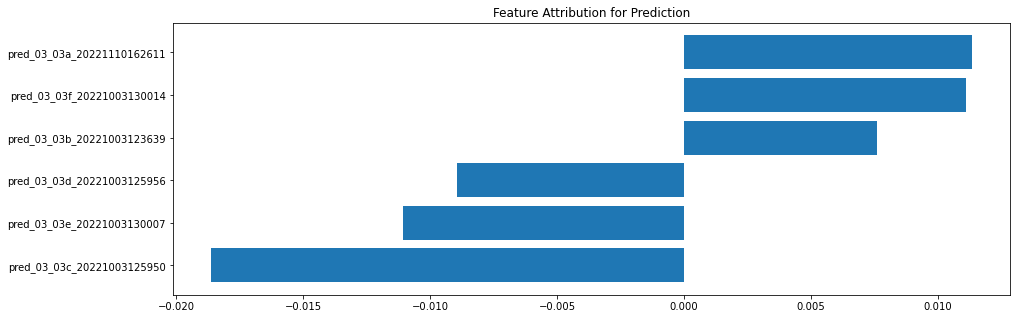

In [121]:
features = []
scores = []
for k in explanation:
    features.append(k['feature'])
    scores.append(k['attribution'])
features = [x for _, x in sorted(zip(scores, features))]
scores = sorted(scores)

plt.figure(figsize=(15,5))
plt.barh(features, scores)
plt.title('Feature Attribution for Prediction')
plt.show()

### Global Explainability
Retrieve the influence of each feature on the model with [ML.GLOBAL_EXPLAIN](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-global-explain).  

In [122]:
query = f"""
SELECT *
FROM ML.GLOBAL_EXPLAIN (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL}`)
"""
gexplain = bq.query(query = query).to_dataframe()

In [123]:
gexplain.head()

,feature,attribution
0,pred_03_03c_20221003125950,0.034823
1,pred_03_03a_20221110162611,0.022588
2,pred_03_03f_20221003130014,0.022579
3,pred_03_03e_20221003130007,0.021249
4,pred_03_03d_20221003125956,0.016608


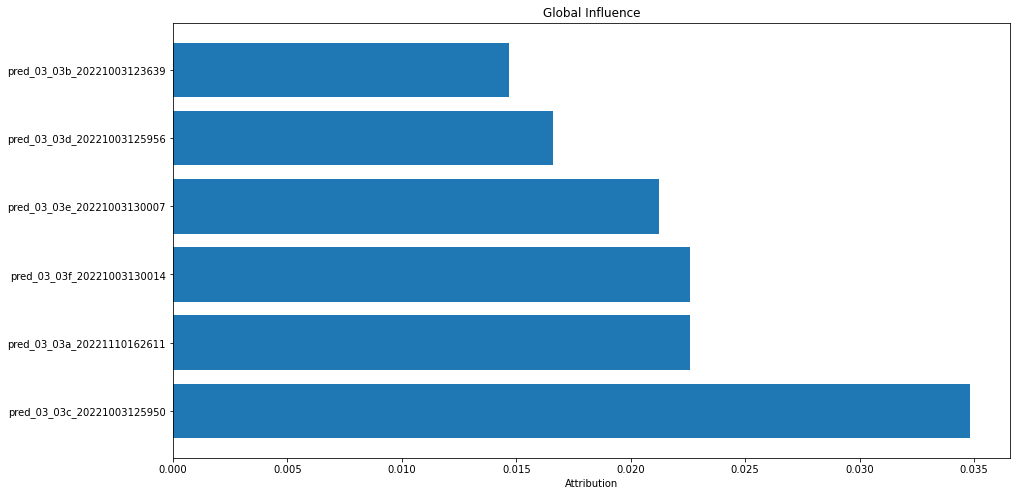

In [124]:
plt.figure(figsize=(15,8))
plt.barh(gexplain['feature'], gexplain['attribution'])
plt.title('Global Influence')
plt.xlabel('Attribution')
#plt.ylabel('Feature')
plt.show()